**Deep Learning:** Deep learning is a subset of machine learning using artificial neural networks to model and solve complex tasks like image recognition, natural language processing, and predictions, mimicking human decision-making through hierarchical feature learning.

**CNN:** A Convolutional Neural Network (CNN) is a type of deep learning model designed for processing grid-like data, such as images. It uses convolutional layers to automatically extract spatial features, pooling layers for dimensionality reduction, and fully connected layers for classification or regression tasks. CNNs excel in image recognition and object detection.

**Importance of Explainability in Deep Learning:** Explainability in deep learning refers to the ability to understand and interpret how a model makes its predictions. It's crucial for building trust, ensuring transparency, and identifying potential biases in models. In sensitive areas like healthcare, finance, or law, explainability helps stakeholders make informed decisions and ensures that the model's behavior aligns with ethical standards and regulatory requirements.

**Attention Mechanism:** An attention mechanism in deep learning is a technique that allows models to focus on specific parts of input data, assigning varying importance to different elements. It enhances performance by prioritizing relevant features, particularly in sequence-based tasks like natural language processing, image captioning, and speech recognition, enabling better context understanding and improved predictions.

**CNN With Attention mechanism:**
A Convolutional Neural Network (CNN) with Attention Mechanism combines the powerful feature extraction capabilities of CNNs with the ability of attention mechanisms to prioritize important regions or features in input data. While CNNs excel at learning spatial hierarchies in images, they treat all features equally within a receptive field. The attention mechanism addresses this by dynamically weighting the relevance of different features or regions, enabling the model to focus on the most critical areas.

**Key Features:**

**Feature Extraction:** CNN layers extract spatial features from images or other structured data.

**Attention Module:** An attention module (e.g., spatial or channel-wise attention) highlights the most informative parts of these features.

**Enhanced Understanding:** The integration improves performance, especially in complex tasks requiring nuanced decision-making like image recognition, object detection, or medical image analysis.

This combination results in more robust, interpretable, and accurate models.

**Grad-CAM:** Gradient-weighted Class Activation Mapping (Grad-CAM) is a visualization technique that highlights regions in an input image contributing most to a model's prediction. It uses gradients from the final convolutional layer to generate heatmaps, providing interpretability by showing which areas influenced the decision, making deep learning models more transparent and explainable.

**Steps associated with Grad-CAM:**

**Forward pass:** The image is passed through the model, and we compute the class score for a target class.

**Backward pass:** The gradient with respect to the class score is computed and backpropagated.

**Activation and Gradient Handling:** We pool the gradients across all channels of the last convolutional layer. These pooled gradients are used to weight the activations, producing a heatmap that highlights important areas in the image.

**Normalization:** The heatmap is normalized to the range [0, 1] and resized to match the input image dimensions.

**Importance of Grad-CAM heatmap:** The Grad-CAM heatmap is applied to the image to visualize important regions for the target class prediction. A color overlay is used to enhance the visibility of the regions of interest. The output will be a visualization of the image with the Grad-CAM heatmap superimposed on top of it. The regions of the image that contribute most to the model's prediction will be highlighted in warmer colors (e.g., red and yellow).

**CIFAR-10 dataset description:** The CIFAR-10 dataset is a collection of 60,000 32x32 color images across 10 categories. The 10 categories in the CIFAR-10 dataset are: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship and Truck. It is widely used for training machine learning models in image classification tasks, with 50,000 training and 10,000 test images.

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s]


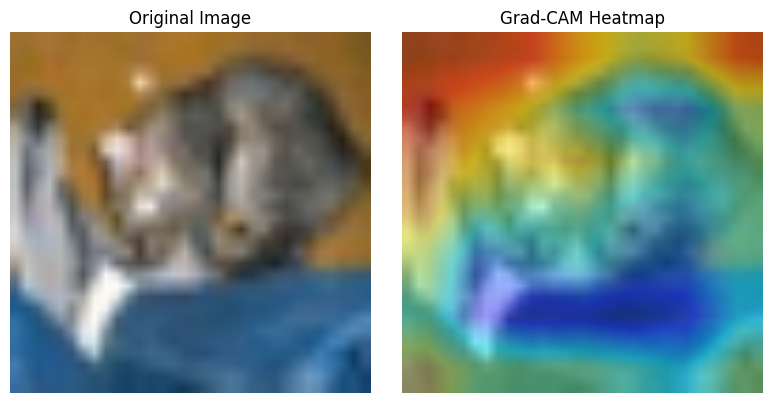

In [ ]:
# Imports
import torch                             # Core PyTorch library for tensors and neural networks
import torch.nn as nn                    # Neural network module (layers, activations, loss functions)
import torchvision.models as models      # Pretrained models like ResNet
import torchvision.transforms as transforms  # For image preprocessing
import torchvision                      # Datasets and utilities for computer vision
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For plotting images and heatmaps
import cv2                               # For image processing

# Load a pretrained model (ResNet18) from torchvision
model = models.resnet18(pretrained=True)       # Load ResNet18 with pretrained ImageNet weights
model.eval()                                   # Set model to evaluation mode (important for inference)


#In PyTorch, a hook is a special function that you can attach to a layer in a neural network to: inspect or modify intermediate outputs (activations), capture gradients during backpropagation.

# Hook for storing the activations and gradients from the last conv layer. These are just placeholder variables (set to None) to store outputs from the hooks.
activations = None
gradients = None

# Define hook to save forward activations
def forward_hook(module, input, output):
    global activations
    activations = output                      #Captures output from a layer (activations). 'activations' stores the feature maps from forward pass.

# Define hook to save backward gradients
def backward_hook(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0]                #Captures gradients during backpropagation. 'gradients' stores the gradients from backpropagation.

# Register hooks on the last conv layer
target_layer = model.layer4[1].conv2          # Final conv layer in ResNet18
target_layer.register_forward_hook(forward_hook)
target_layer.register_backward_hook(backward_hook)

# Image preprocessing for ResNet (normalization, resizing, etc.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),            # Resize image to 224x224 (ResNet input size)
    transforms.ToTensor(),                    # Convert PIL image to PyTorch tensor
    transforms.Normalize(                     # Normalize with ImageNet means and std. These values are the per-channel mean and standard deviation of the RGB values computed over the entire ImageNet training set.
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load a sample image from CIFAR-10 (you could replace this with any custom image)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
sample_image, _ = testset[0]                  # Get first image from CIFAR-10 test set
input_tensor = sample_image.unsqueeze(0)      # Add batch dimension (1, 3, 224, 224) where 1: batch size, 3: number of channels, 224 pixels: height and 224 pixels: width.

# Forward pass
output = model(input_tensor)                  # Get predictions
predicted_class = output.argmax(dim=1).item() # Predicted class index

# Backward pass to get gradients for the predicted class
model.zero_grad()                             # Zero out previous gradients
class_score = output[0, predicted_class]      # Get the score of the predicted class
class_score.backward()                        # Compute gradients w.r.t that class

# Compute Grad-CAM heatmap
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])  # Mean gradients for each channel. dim=0 → batch dimension, dim=2 → height and dim=3 → width.
for i in range(activations.shape[1]):                    # Multiply each channel by its gradient. 'activations.shape[1]' returns the number of channels (C) in the activation map — i.e., how many feature maps were produced by the convolutional layer.
    activations[:, i, :, :] *= pooled_gradients[i]       #Multiplies each channel by its corresponding mean gradient (i.e., its importance to the prediction). This is how Grad-CAM highlights important features.

heatmap = torch.mean(activations, dim=1).squeeze()       # Average over channels -> (H, W).
heatmap = np.maximum(heatmap.detach().numpy(), 0)        # .detach(): This removes the heatmap tensor from the PyTorch computational graph because we no longer need gradients. .numpy() converts tensor to a NumPy array and apply ReLU with np.maximum().
heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1  # Normalize between 0 and 1.

# Convert original image for visualization
original_image = sample_image.permute(1, 2, 0).numpy()     # Converts the image from CHW (PyTorch format) to HWC (NumPy/image format) for plotting.
original_image = (original_image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]  # Unnormalize.
original_image = np.clip(original_image, 0, 1)             # Clip values between 0 and 1.

# Resize heatmap to match image size
heatmap_resized = cv2.resize(heatmap, (224, 224))          # Resize heatmap to image dimensions.
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)  # Apply color map. cv2.COLORMAP_JET is a predefined color map provided by OpenCV, commonly used for visualizing heatmap data.
heatmap_colored = np.float32(heatmap_colored) / 255        # Normalize color map.

# Overlay heatmap on image
overlayed_image = 0.4 * heatmap_colored + 0.6 * original_image
# Combine heatmap with original image. 0.4 * heatmap_colored: Scales the heatmap's intensity to 40%, making it semi-transparent. 0.6 * original_image: Scales the original image’s brightness to 60%, so it's still visible underneath the heatmap.

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(overlayed_image)
plt.axis('off')
plt.tight_layout()
plt.show()


The left image is the original CIFAR-10 sample, showing a dog. The right Grad-CAM heatmap highlights regions influencing the model's prediction—warmer colors (red/yellow) indicate high importance, showing the model focused on the dog’s head area.